<a href="https://colab.research.google.com/github/samikshyasanskruti/Deep-Learning/blob/main/Neural_Network_with_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

**2.Preprocess the Dataset**

In [ ]:
# Get the data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(url,delimiter=';')


In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


 **3.Perform EDA**

In [ ]:
X=data.drop('quality',axis=1)
y=data['quality']

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [ ]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [ ]:
#One-hot encoding

OHE=OneHotEncoder(sparse_output=False)
y_encoded=OHE.fit_transform(y.values.reshape(-1,1))
print(y_encoded)

[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [ ]:
# split training and test split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
#scaling

scaler=StandardScaler()
#scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

**4.Build Model**

In [ ]:
# create the MLP model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense

model=Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,590 (45.27 KB)

 Trainable params: 11,590 (45.27 KB)

 Non-trainable params: 0 (0.00 B)

**5.Train Model Using Optimization Techniques**

In [ ]:
from tensorflow.keras.optimizers import SGD,Adagrad,RMSprop,Adam
#optimizer=SGD(learning_rate=0.001,momentum=0.9)
#optimizer=Adagrad(learning_rate=0.1,initial_accumulator_value=0)
#optimizer=RMSprop(learning_rate=0.001,rho=0.9)
#optimizer=Adam(learning_rate=0.001)


lr_schedule=tensorflow.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10,
    decay_rate=0.5,staircase=True)

optimizer=Adam(learning_rate=0.01)
#optimizer=RMSprop(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2,verbose=1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3880 - loss: 3.0580 - val_accuracy: 0.4297 - val_loss: 1.1342
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4843 - loss: 1.1591 - val_accuracy: 0.4414 - val_loss: 1.1243
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5009 - loss: 1.1299 - val_accuracy: 0.5391 - val_loss: 1.1091
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4803 - loss: 1.1672 - val_accuracy: 0.4844 - val_loss: 1.0826
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4716 - loss: 1.1391 - val_accuracy: 0.5352 - val_loss: 1.0905
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4721 - loss: 1.1374 - val_accuracy: 0.5664 - val_loss: 1.0778
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5247 - loss: 1.1148 - val_accuracy: 0.5586 - val_loss: 1.0483
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5017 - loss: 1.1124 - val_accuracy: 0.5195 - va

**6.Plot Loss and Accuracy Curve**

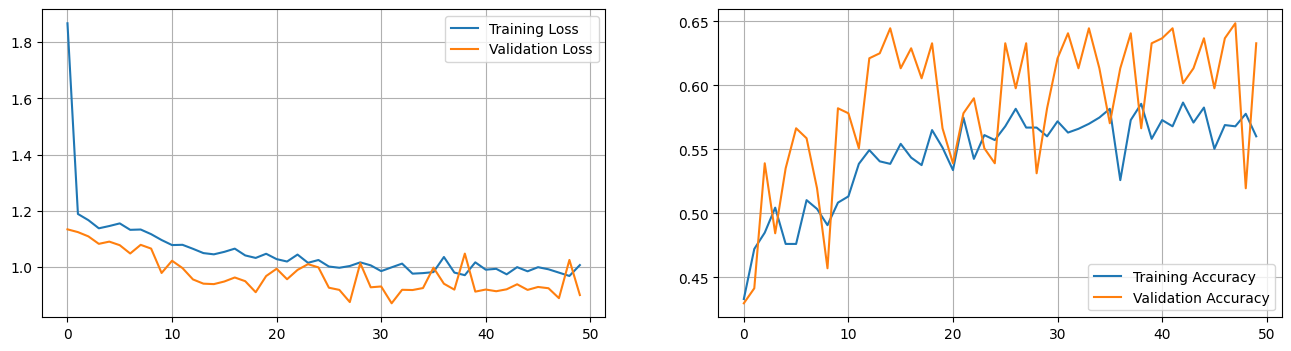

In [ ]:
#plotting training an validation loss/accuracy
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.grid()


**7.Generate Classification Report**

In [ ]:
#prediction
y_pred=model.predict(X_test).round()


y_pred=np.argmax(y_pred, axis= 1)
y_test=np.argmax(y_test, axis= 1)

print('Accuracy:', accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.375
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       109
           1       0.00      0.00      0.00         0
           2       0.69      0.60      0.65       149
           3       0.15      0.53      0.24        38
           4       0.24      0.42      0.30        24
           5       0.00      0.00      0.00         0

    accuracy                           0.38       320
   macro avg       0.18      0.26      0.20       320
weighted avg       0.36      0.38      0.35       320



**8.Confusion Matrix**

[[ 0  0  1  0  0  0]
 [ 2  0  8  0  0  0]
 [35  0 90  4  1  0]
 [54  0 47 20 11  0]
 [17  0  3 12 10  0]
 [ 1  0  0  2  2  0]]


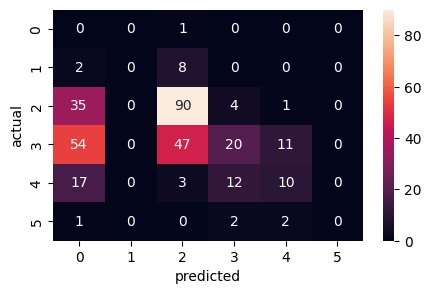

In [ ]:
cm=confusion_matrix(y_test,y_pred)

print(cm)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()